Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0  

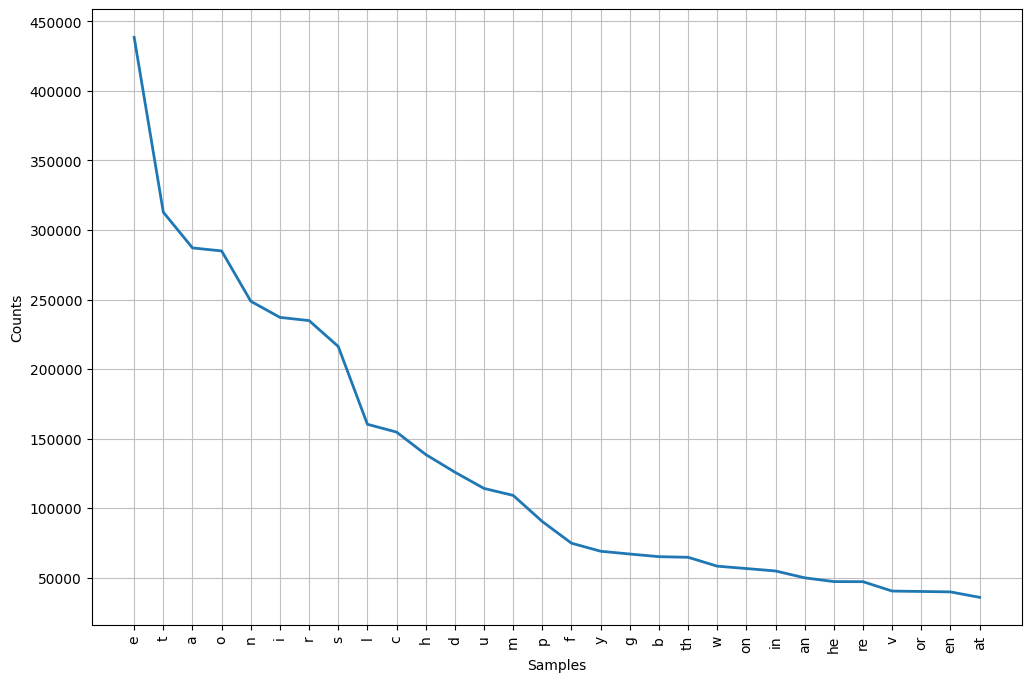

"Congratulations! You have won a free iPhone!" - SPAM
"Dear friend, I need your help with a money transfer." - SPAM
"Your order has been shipped. Thank you for your purchase!" - NOT SPAM
"Get paid to work from home! Limited time offer." - NOT SPAM
"Important: Your account will be suspended unless you verify your information." - NOT SPAM


In [ ]:
import pandas as pd
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/emails.csv'
df = pd.read_csv(file_path)

print(df.head())
all_words = df.columns[1:]
word_list = []
for col in all_words:
    word_list.extend([col] * df[col].sum())
fdist = FreqDist(word_list)

plt.figure(figsize=(12, 8))
fdist.plot(30, cumulative=False)
plt.show()

filtered_words = []
for word, frequency in fdist.items():
    if frequency > 100000:
        filtered_words.append((word, frequency))
emails = [
    "Congratulations! You have won a free iPhone!",
    "Dear friend, I need your help with a money transfer.",
    "Your order has been shipped. Thank you for your purchase!",
    "Get paid to work from home! Limited time offer.",
    "Important: Your account will be suspended unless you verify your information."
]
def check_for_spam(email):
    email_words = email.lower().split()
    for word, _ in filtered_words:
        if word in email_words:
            return "SPAM"
    return "NOT SPAM"
spam_results = {email: check_for_spam(email) for email in emails}
for email, result in spam_results.items():
    print(f'"{email}" - {result}')